In [1]:
import os
import pandas as pd
import numpy as np
import itertools
from matplotlib import pyplot as plt
from datetime import datetime
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages")

%matplotlib inline

In [3]:
# stock return analysis

stock_price = pd.read_excel('./dataset/tickerdata.xlsx',sheet_name= 'Sheet1', engine='openpyxl', index_col=[0])

stock_tickers = stock_price.filter(regex='^(?!Unnamed)').columns
new_col       = np.repeat(stock_tickers,5)
stock_price.columns = new_col
close_price         = stock_price.loc[:,stock_price.iloc[0,]=='Close']
open_price          = stock_price.loc[:,stock_price.iloc[0,]=='Open']
volume             = stock_price.loc[:,stock_price.iloc[0,]=='Volume']

close_price        = close_price.reset_index()
close_price        = close_price .drop(index = [0,1])
#.columns[0] = ['DATE']
close_price  = close_price.set_index('index')

daily_return_close2close = close_price.diff(1)/close_price

daily_return_open2close = (open_price - close_price)/open_price

def get_cumulative_return_plot(df):
    plt.figure(figsize = (15,15))
    for ticker in df.columns:
        ((1+ df[ticker].fillna(0)).cumprod()-1).plot(label = ticker)
    plt.legend(loc = 'lower center',ncol=round(len(df.columns)/4))

#get_cumulative_return_plot(daily_return_close2close)
#get_cumulative_return_plot(daily_return_open2close)

#print(daily_return_open2close.head)

daily_trend = daily_return_open2close#._get_numeric_data()
#daily_trend[daily_trend < 0] = -1.0
#daily_trend[daily_trend > 0] = +1.0
#daily_trend[daily_trend == 0] = 0.0

daily_return_open2close= daily_return_open2close.fillna(0.0)
#daily_return_open2close.date

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.7/site-packages/pandas/core/indexes/base.py:3519: RuntimeWarning: '<' not supported between instances of 'float' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


In [5]:
sent_by_ticker = pd.read_csv("./dataset/sentiment_by_ticker_sum.csv")
#print(sent_by_ticker.head)

In [6]:
my_cols = list(sent_by_ticker.columns)
my_new_cols = [ cc+"_sentiment" for cc in my_cols]

In [7]:
trend = sent_by_ticker._get_numeric_data()
#trend[trend < 0] = -1
#trend[trend > 0] = +1
sent_by_ticker.columns = my_new_cols
df2=sent_by_ticker

In [8]:
daily_return_open2close['Day_sentiment'] = daily_return_open2close.index   

In [9]:
#daily_return_open2close = daily_return_open2close.reset_index(drop=True)
#sent_by_ticker = sent_by_ticker.reset_index(drop=True)
#sent_by_ticker.head

df=daily_return_open2close#["Day_sentiment"]
print(df.dropna())
df.drop(df.tail(1).index,inplace=True) # drop last n rows
df = df.dropna()
print(df)

#print(daily_return_open2close.head)
#df['Day_sentiment'] = [x.lstrip('00:00:00') for x in df['Day_sentiment']]


#print(daily_return_open2close.columns)
#print(sent_by_ticker.columns)
#print(sent_by_ticker.head)

                         PLTR       RKT       ONE       AMC      REAL  \
2021-01-28 00:00:00  0.098129  0.073075  0.020779  0.279633 -0.075536   
2021-01-29 00:00:00  0.039060  0.120988 -0.005376  0.073375  0.055068   
2021-02-01 00:00:00  0.038777  0.004161  0.002695  0.217647 -0.006274   
2021-02-02 00:00:00  0.090323  0.040770  0.010610  0.175105  0.018737   
2021-02-03 00:00:00  0.019450  0.018056  0.013441 -0.013559 -0.003702   
...                       ...       ...       ...       ...       ...   
2021-08-10 00:00:00  0.003911  0.021348  0.093261  0.139566  0.086228   
2021-08-11 00:00:00  0.031209 -0.003419 -0.026659  0.000950 -0.065861   
2021-08-12 00:00:00 -0.017996  0.002284  0.080006 -0.069880  0.016140   
2021-08-13 00:00:00  0.004000 -0.055342  0.035680 -0.039441  0.038905   
Date                 0.000000  0.000000  0.000000  0.000000  0.000000   

                         SPCE       AMD        DD       GME      TSLA  ...  \
2021-01-28 00:00:00  0.073103  0.025715 -0.03

In [10]:
df["Day_sentiment"]=pd.to_datetime(df['Day_sentiment'])
print(df)

                PLTR       RKT       ONE       AMC      REAL      SPCE  \
2021-01-28  0.098129  0.073075  0.020779  0.279633 -0.075536  0.073103   
2021-01-29  0.039060  0.120988 -0.005376  0.073375  0.055068  0.026593   
2021-02-01  0.038777  0.004161  0.002695  0.217647 -0.006274 -0.140344   
2021-02-02  0.090323  0.040770  0.010610  0.175105  0.018737  0.170848   
2021-02-03  0.019450  0.018056  0.013441 -0.013559 -0.003702 -0.142857   
...              ...       ...       ...       ...       ...       ...   
2021-08-09 -0.049428 -0.004561  0.076386 -0.034272  0.014751 -0.066970   
2021-08-10  0.003911  0.021348  0.093261  0.139566  0.086228  0.098417   
2021-08-11  0.031209 -0.003419 -0.026659  0.000950 -0.065861  0.083417   
2021-08-12 -0.017996  0.002284  0.080006 -0.069880  0.016140  0.031728   
2021-08-13  0.004000 -0.055342  0.035680 -0.039441  0.038905 -0.005549   

                 AMD        DD       GME      TSLA  ...      WISH      UWMC  \
2021-01-28  0.025715 -0.036810  

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df['Day_sentiment']=df['Day_sentiment'].astype(str)
df2['Day_sentiment']=df2['Day_sentiment'].astype(str)

df= df.reset_index(drop=True)
#print(pd.concat([df,df2], join='inner', axis=1))
concated = pd.concat([df,df2], join='inner', axis=1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
concated.head

<bound method NDFrame.head of          PLTR       RKT       ONE       AMC      REAL      SPCE       AMD  \
0    0.098129  0.073075  0.020779  0.279633 -0.075536  0.073103  0.025715   
1    0.039060  0.120988 -0.005376  0.073375  0.055068  0.026593  0.021928   
2    0.038777  0.004161  0.002695  0.217647 -0.006274 -0.140344 -0.009559   
3    0.090323  0.040770  0.010610  0.175105  0.018737  0.170848 -0.004181   
4    0.019450  0.018056  0.013441 -0.013559 -0.003702 -0.142857  0.008014   
..        ...       ...       ...       ...       ...       ...       ...   
133 -0.049428 -0.004561  0.076386 -0.034272  0.014751 -0.066970  0.033510   
134  0.003911  0.021348  0.093261  0.139566  0.086228  0.098417  0.013160   
135  0.031209 -0.003419 -0.026659  0.000950 -0.065861  0.083417 -0.000744   
136 -0.017996  0.002284  0.080006 -0.069880  0.016140  0.031728  0.008288   
137  0.004000 -0.055342  0.035680 -0.039441  0.038905 -0.005549 -0.031539   

           DD       GME      TSLA  ...  AM_se

In [12]:
#get_cumulative_return_plot(concated)

2021-01-28    0.279633
2021-01-29    0.073375
2021-02-01    0.217647
2021-02-02    0.175105
2021-02-03   -0.013559
                ...   
2021-08-10    0.139566
2021-08-11    0.000950
2021-08-12   -0.069880
2021-08-13   -0.039441
NaT           0.000000
Name: AMC, Length: 139, dtype: float64


<AxesSubplot:>

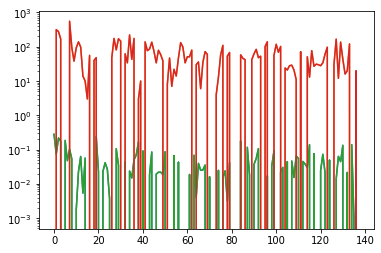

In [17]:
print(daily_return_open2close["AMC"])
#get_cumulative_return_plot(daily_return_open2close)
(concated["AMC"].plot())
(concated["AMC_sentiment"]).plot()
#concated = concated.drop('Day_sentiment', 1)
#concated = concated.drop('DD', 1)

concated["AMC"].plot(logy=True, legend=False)
concated["AMC_sentiment"].plot(logy=True, legend=False)



In [14]:
corr = concated.corr()

print("Top Absolute Correlations")

#my_top_corrs = get_top_correlations(concated)
#print((my_top_corrs))



Top Absolute Correlations


In [15]:
my_final_sent_stock_corr = {}
for ll in corr.columns:
    my_col = corr[ll]
    if ll+"_sentiment" in my_col:
        #print(ll)
        #print(my_col[ll+"_sentiment"])
        my_final_sent_stock_corr[ll] = my_col[ll+"_sentiment"]
print(my_final_sent_stock_corr)
my_sorted_sent_stock = {k: v for k, v in sorted(my_final_sent_stock_corr.items(), key=lambda item: item[1])}

my_sorted_sent_stock_abs = {k: v for k, v in sorted(my_final_sent_stock_corr.items(), key=lambda item: abs(item[1]))}


print(" sorted stock corr \n")
for k, v in my_sorted_sent_stock.items():
    print("{0}, {1}".format(k,v))

print(" --------- sorted by ABS ---------- \n")    
for k, v in my_sorted_sent_stock_abs.items():
    print("{0}, {1}".format(k,v))

{'PLTR': 0.2248516121653261, 'RKT': -0.008206672479583113, 'ONE': -0.04801345611814057, 'AMC': 0.0850947857186787, 'REAL': -0.1208105651820028, 'SPCE': -0.04250212425329221, 'AMD': 0.09353431445738483, 'GME': 0.14609483572143916, 'TSLA': -0.0021388989152977588, 'CRSR': -0.048052112980076195, 'RH': -0.03736796990944613, 'BB': 0.029047477250295613, 'CLOV': -0.04521978463945638, 'NOK': 0.0324534650928958, 'AM': -0.03275780529730306, 'WISH': -0.042866199244769934, 'UWMC': 0.07413058631940111, 'BY': 0.07876416257665884, 'MVIS': 0.16161231659796377, 'NIO': -0.06787572804057622, 'APP': -0.01225433847789067, 'SNDL': -0.08842766115325462, 'AAL': -0.2040899708953528, 'TD': 0.006410108867554601}
 sorted stock corr 

AAL, -0.2040899708953528
REAL, -0.1208105651820028
SNDL, -0.08842766115325462
NIO, -0.06787572804057622
CRSR, -0.048052112980076195
ONE, -0.04801345611814057
CLOV, -0.04521978463945638
WISH, -0.042866199244769934
SPCE, -0.04250212425329221
RH, -0.03736796990944613
AM, -0.0327578052973

In [16]:
my_sorted_sent_stock_abs_list=list(my_sorted_sent_stock_abs.items())


top_five = my_sorted_sent_stock_abs_list[-5:]
bot_five = my_sorted_sent_stock_abs_list[:5]

top_five.reverse()

print(top_five)
print(bot_five)

[('PLTR', 0.2248516121653261), ('AAL', -0.2040899708953528), ('MVIS', 0.16161231659796377), ('GME', 0.14609483572143916), ('REAL', -0.1208105651820028)]
[('TSLA', -0.0021388989152977588), ('TD', 0.006410108867554601), ('RKT', -0.008206672479583113), ('APP', -0.01225433847789067), ('BB', 0.029047477250295613)]


In [17]:
corr.style.background_gradient(cmap="hot")#, annot=True)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

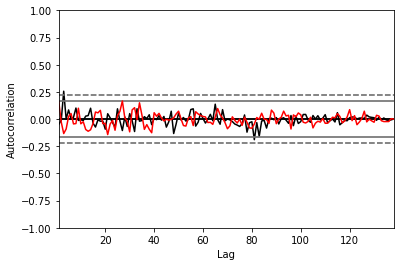

In [18]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(concated['AMC'],c='k')
autocorrelation_plot(concated['AMC_sentiment'],c='r')
#df['AMC'].autocorr(lag=1)


In [19]:
from statsmodels.graphics.tsaplots import plot_acf


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

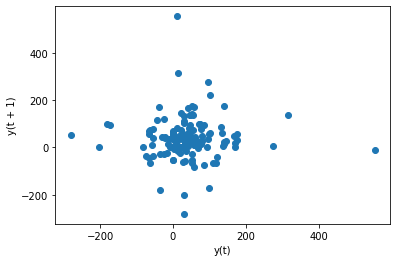

In [20]:
from pandas.plotting import lag_plot

lag_plot(concated["AMC_sentiment"].sample(137))

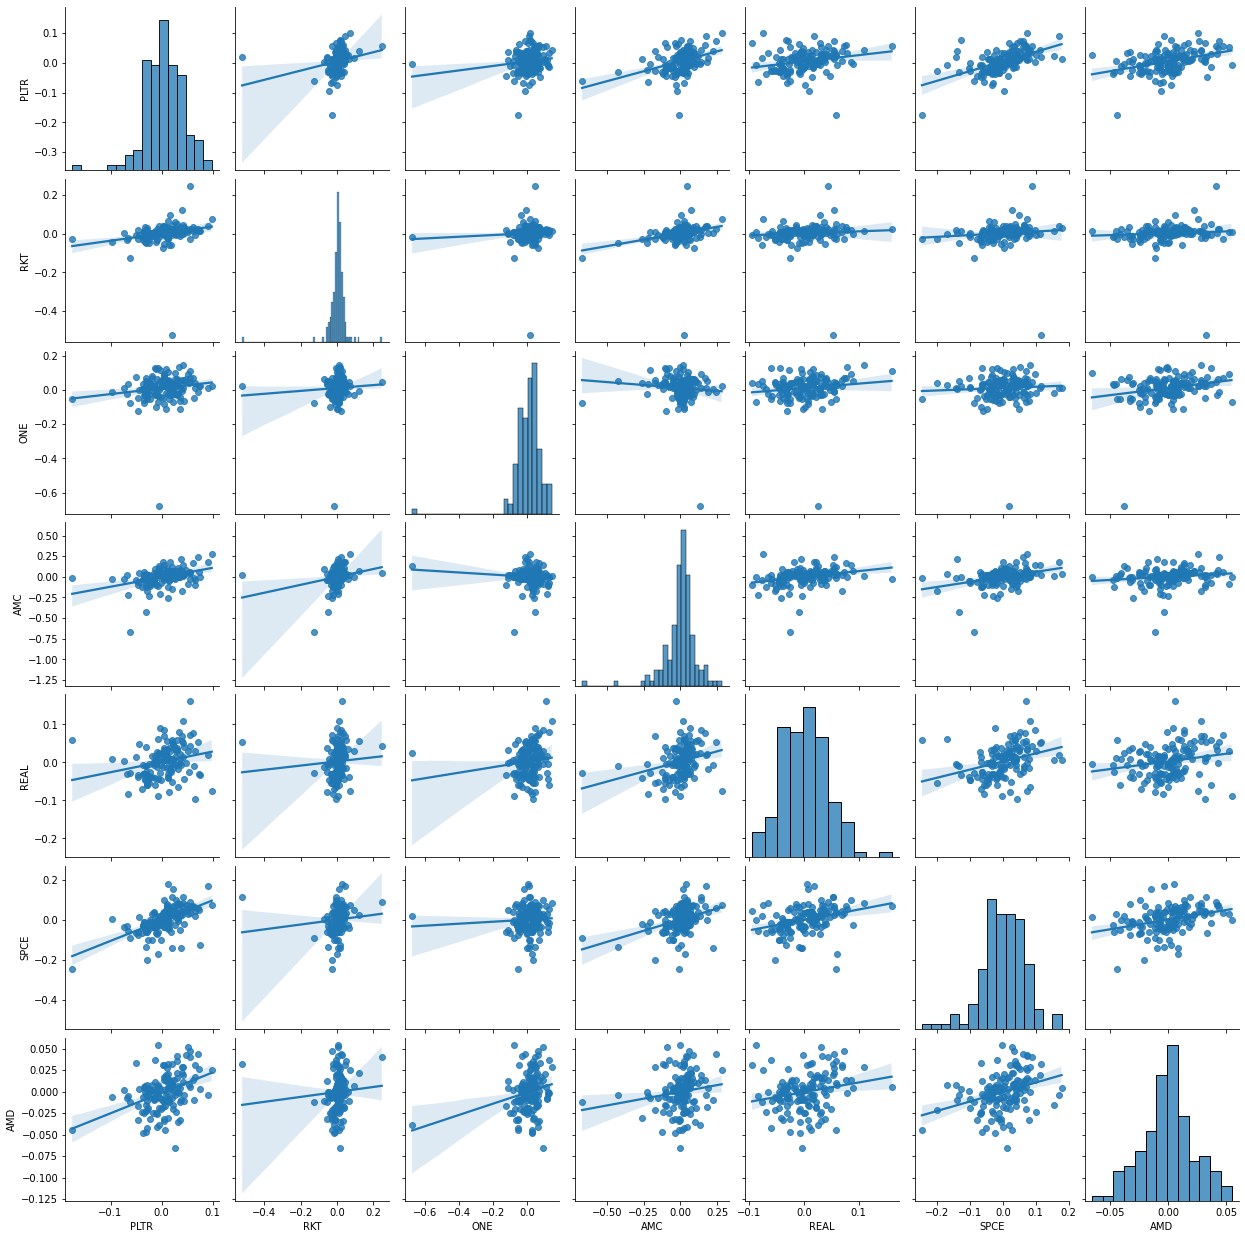

In [21]:
#grr = pd.plotting.scatter_matrix(df.loc[:, 'PLTR':'RH'], figsize=(15, 15), marker='o',
#                        hist_kwds={'bins': 20}, s=60, alpha=.8)
import seaborn as sns

sns.pairplot(df.loc[:,"PLTR":"AMD"], kind='reg')

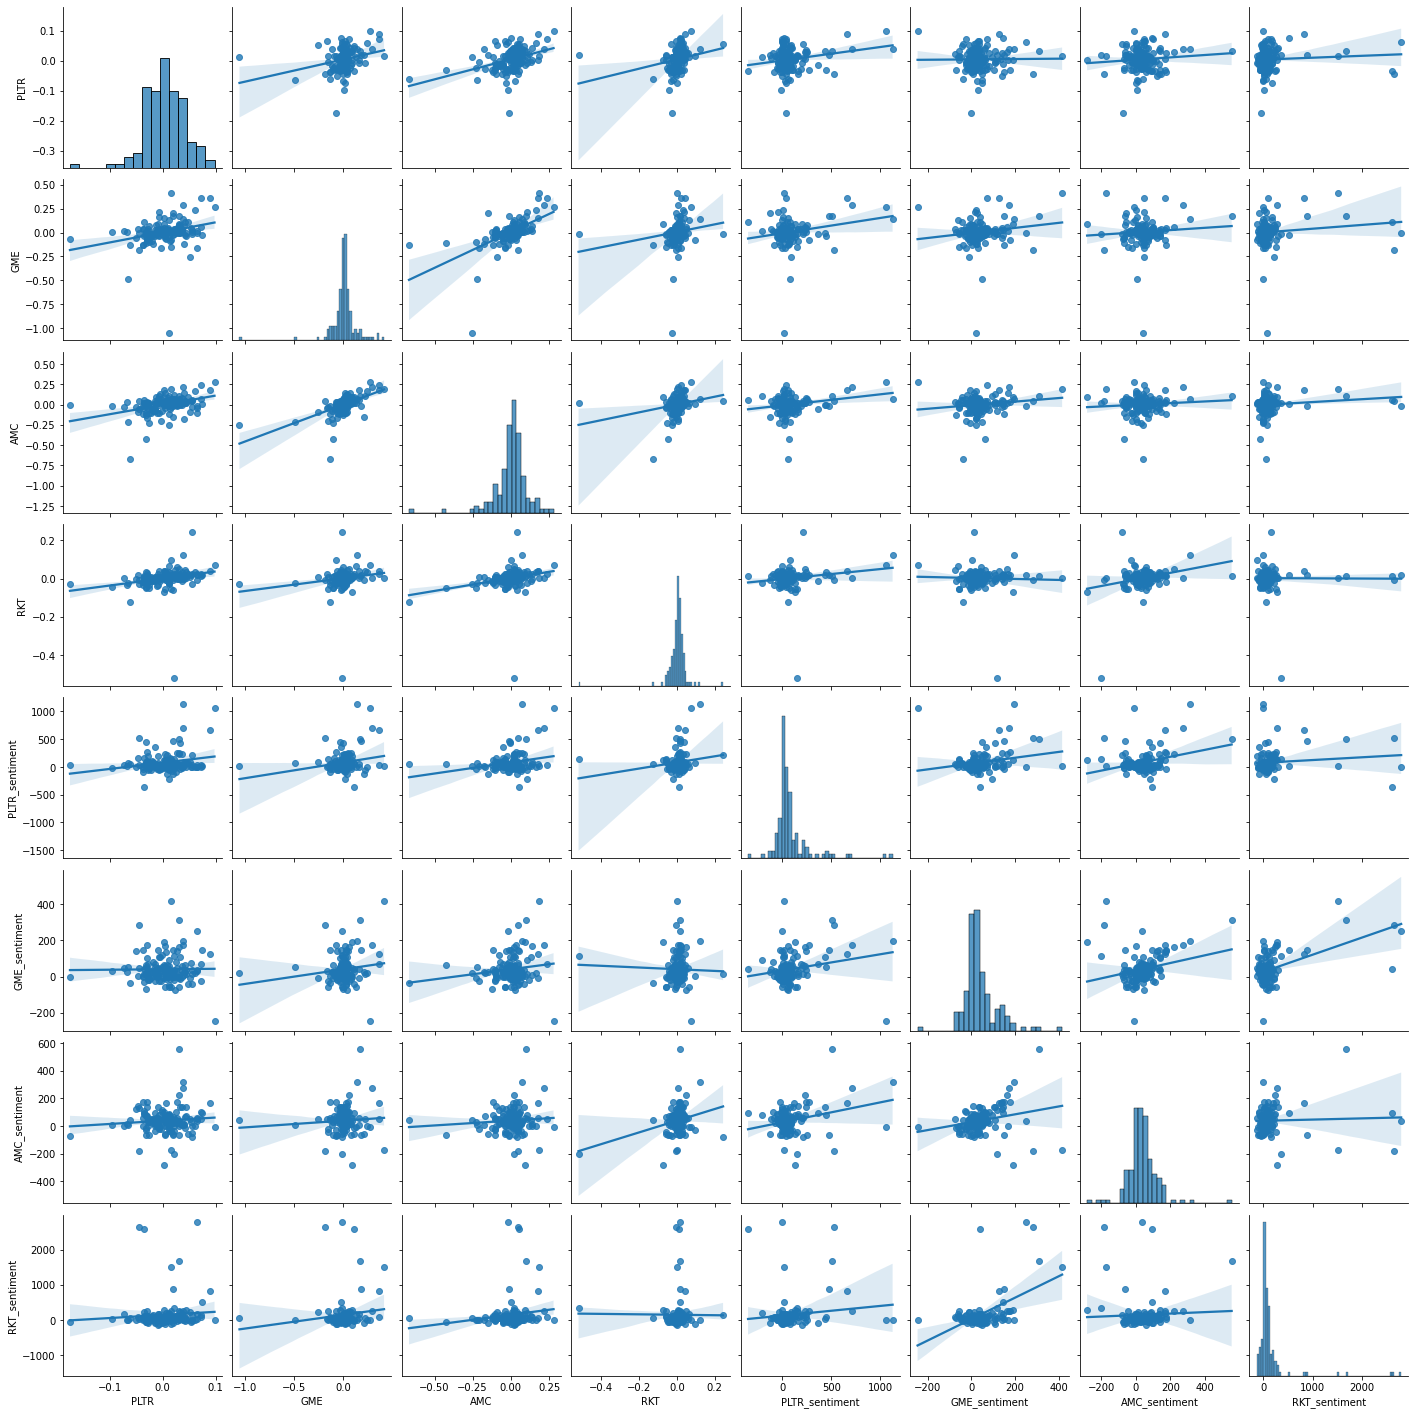

In [27]:
g=sns.pairplot(concated.loc[:,["PLTR","GME","AMC","RKT","PLTR_sentiment","GME_sentiment","AMC_sentiment","RKT_sentiment"]], kind='reg')

In [26]:
#sns.pairplot(concated.loc[:,["PLTR","GME","AMC","RKT","SPCE","RH","PLTR_sentiment","GME_sentiment","AMC_sentiment","RKT_sentiment","SPCE_sentiment","RH_sentiment"]], kind='reg')

In [465]:
# calculate total number of times stock up and sentiment up vs stock down sentiment down, and up/down and down/up

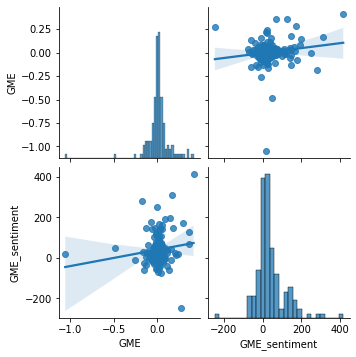

In [22]:
g=sns.pairplot(concated.loc[:,["GME","GME_sentiment"]], kind='reg')

(-0.2, 0.2)

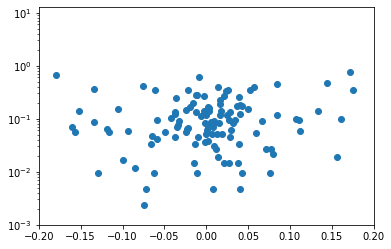

In [23]:
max_sent = concated.loc[:,["GME_sentiment"]].max()
plt.scatter(concated.loc[:,["GME"]], np.abs(concated.loc[:,["GME_sentiment"]].divide(max_sent)))
plt.yscale("log")
plt.ylim(1e-3)
plt.xlim([-0.2, 0.2])

In [24]:
print((concated.loc[:,["GME_sentiment"]].max()))

GME_sentiment    416.0
dtype: float64
